In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

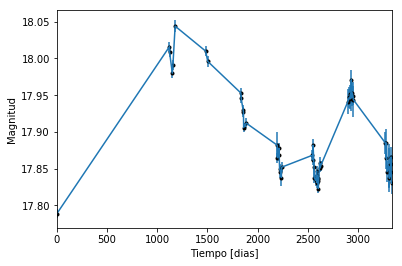

In [2]:
data = np.genfromtxt('LC_23309_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

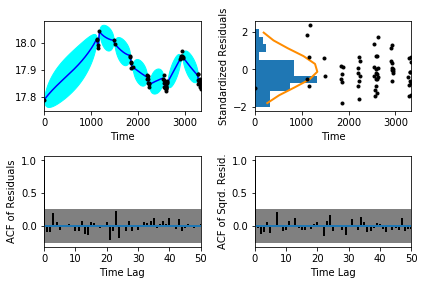

In [5]:
sample.assess_fit()

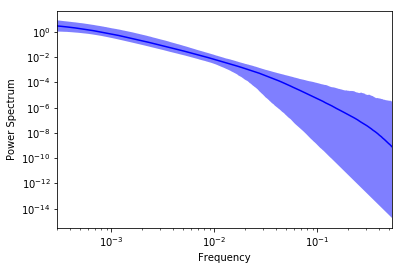

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.0105563,'Medida del nivel de ruido')

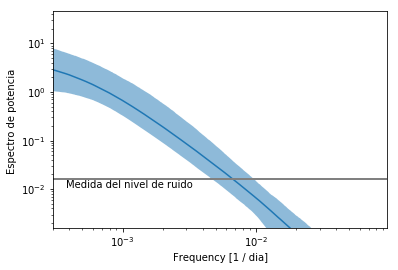

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

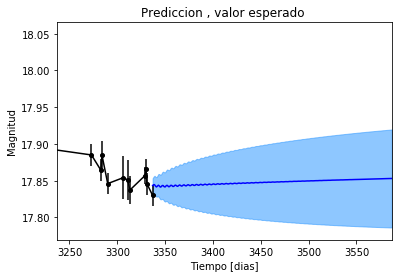

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

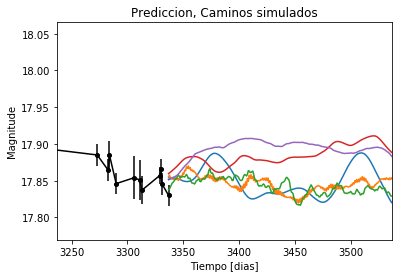

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


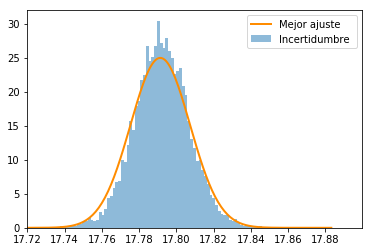

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

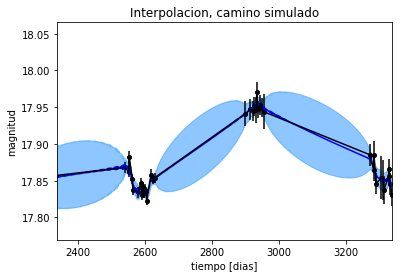

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

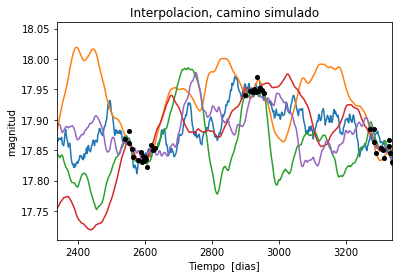

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 580.615620771
Median: 0.0353765512252
Standard deviation: 0.216733241821
68% credibility interval: [ 0.00284423  0.28198543]
95% credibility interval: [  4.62981343e-04   8.26765054e-01]
99% credibility interval: [  3.36461332e-04   1.01558949e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 529.590421875
Median: 0.0179581224377
Standard deviation: 0.132630661976
68% credibility interval: [ 0.00132065  0.11859676]
95% credibility interval: [  3.58822778e-04   4.92034499e-01]
99% credibility interval: [  3.14074172e-04   7.97872970e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 335.165143016
Median: 0.0484538499035
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 877.649262707
Median: 180.823984107
Standard deviation: 1.7151034417
68% credibility interval: [ 178.8625078   182.06463708]
95% credibility interval: [ 176.29203045  182.74234775]
99% credibility interval: [ 174.23515377  183.10207657]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 384.402504965
Median: 1.20904591064
Standard deviation: 2.58932731498
68% credibility interval: [ 0.19913263  4.97381386]
95% credibility interval: [ 0.05431739  9.31563256]
99% credibility interval: [  0.02105624  12.0170929 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 864.03168689
Median: 3.69452083553
Standard deviation: 12.8535797621
68% credibility interval: [  0.31300927  22.26914805]
95% credibility interval: [  1.99943158e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3851.83438999
Median: 1.22623485436e-36
Standard deviation: 3.25638102934e+30
68% credibility interval: [  5.73617782e-105   1.08869635e-012]
95% credibility interval: [  4.45408285e-149   6.32172904e-001]
99% credibility interval: [  1.52326511e-179   4.36468127e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2378.17786447
Median: 17.8987283472
Standard deviation: 0.0383964266576
68% credibility interval: [ 17.86191354  17.93320783]
95% credibility interval: [ 17.81689624  17.97043739]
99% credibility interval: [ 17.78391088  18.0062665 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 314.422358948
Median: 0.166616318949
Standard deviation: 0.30873543891
68% credibility interval: [ 0.          0.67138785]
95% credibility interval: [ 0.         0.9791412]
99% credibility interval: [ 0.          1.03895162]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 314.422358948
Median: 0.166616318949
Standard deviation: 0.30873543891
68% credibility interval: [ 0.          0.67138785]
95% credibility interval: [ 0.         0.9791412]
99% credibility interval: [ 0.          1.03895162]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 5443.50591337
Median: 0.0
Standard deviation: 0.000117457946311
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 877.649262707
Median: 180.823984107
Standard deviation: 1.7151034417
68% credibility interval: [ 178.8625078   182.06463708]
95% credibility interval: [ 176.29203045  182.74234775]
99% credibility interval: [ 174.23515377  183.10207657]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1352.29175759
Median: 0.00581727814944
Standard deviation: 0.00364094932739
68% credibility interval: [ 0.00388076  0.00929774]
95% credibility interval: [ 0.00275819  0.01515748]
99% credibility interval: [ 0.0022581   0.02274339]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1119.77655374
Median: 0.974107665626
Standard deviation: 0.170685759248
68% credibility interval: [ 0.82663823  1.1528766 ]
95% credibility interval: [ 0.70314381  1.3780511 ]
99% credibility interval: [ 0.63765042  1.5180766 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 437.62339025
Median: 0.00333099562098
Standard deviation: 0.0964772764448
68% credibility interval: [ 0.00015221  0.03968111]
95% credibility interval: [  3.82853389e-06   2.96179505e-01]
99% credibility interval: [  3.56405194e-07   6.79609644e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 580.615620771
Median: (-0.222277426877-5.36921239062j)
Standard deviation: 2.37010935643
68% credibility interval: [-1.77176669-0.50687875j -0.01787084-5.356772j  ]
95% credibility interval: [ -5.19471804e+00+0.j          -2.90899757e-03-2.71908996j]
99% credibility interval: [ -6.38113695e+00-6.64541774j  -2.11404890e-03-1.24356383j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 529.590421875
Median: (-0.112834211045+1.29318615743j)
Standard deviation: 2.11126679565
68% credibility interval: [-0.74516544+3.83639978j -0.00829788+2.05569528j]
95% credibility interval: [ -3.09154394e+00+4.75723694j  -2.25455001e-03+1.69346613j]
99% credibility interval: [ -5.01318372e+00+2.08649958j  -1.97338622e-03+0.01085871j]
Poster